In [14]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 31.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 18.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 9.5 MB/s eta 0:00:00m eta 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [29]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

Raw shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Processed shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


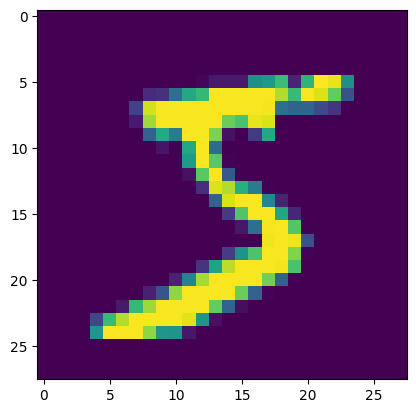

In [30]:
from tensorflow.keras.datasets import mnist

# 1) Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Raw shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 2) Scale to [0,1]
x_train = x_train / 255.0
x_test  = x_test / 255.0

print("Processed shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# (Optional) quick peek
plt.imshow(x_train[0])
plt.show()

In [32]:
# Build a small, easy-to-understand CNN
model_cnn = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Compile and train (Adam is simple and works well)
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_cnn = model_cnn.fit(
    x_train, y_train,
    epochs=1,            # you can increase later
    batch_size=128,
    validation_data=(x_test, y_test)
)


469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 58ms/step - accuracy: 0.9446 - loss: 0.1883 - val_accuracy: 0.9821 - val_loss: 0.0561


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9821 - loss: 0.0561
[CNN] Test accuracy: 0.9821000099182129 | Test loss: 0.05608569458127022
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix (first 5 rows):
 [[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    5 1019    0    0    0    0    7    0    0]
 [   1    2    2  988    0    5    0    7    0    5]
 [   0    3    0    0  969    0    4    2    0    4]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       1.00 

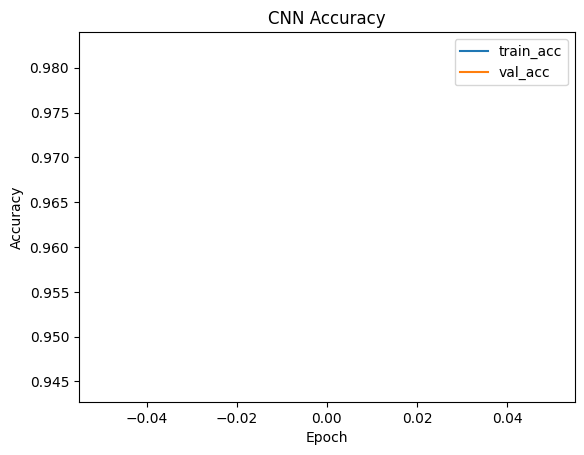

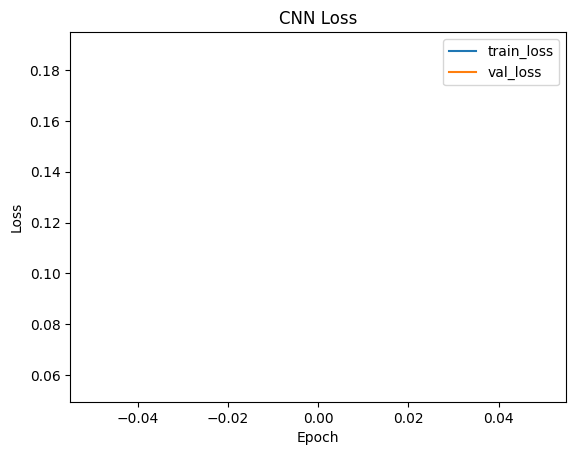

In [37]:
# 1) Test accuracy
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print(f"[CNN] Test accuracy: {test_acc} | Test loss: {test_loss}")

# 2) Confusion matrix (optional but useful)
from sklearn.metrics import confusion_matrix, classification_report
y_prob = model_cnn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix (first 5 rows):\n", cm[:5])

# 3) Quick classification report
print(classification_report(y_test, y_pred))

# 4) Plot training curves (accuracy & loss)
plt.plot(history_cnn.history['accuracy'], label='train_acc')
plt.plot(history_cnn.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('CNN Accuracy'); plt.legend(); plt.show()

plt.plot(history_cnn.history['loss'], label='train_loss')
plt.plot(history_cnn.history['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('CNN Loss'); plt.legend(); plt.show()


2


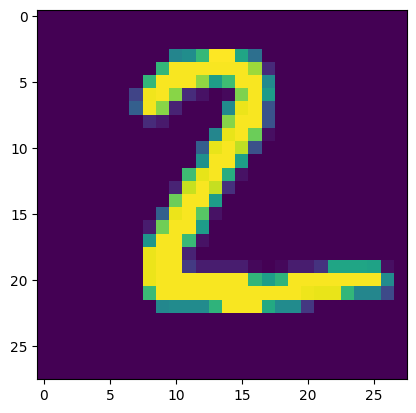

In [28]:
print(np.argmax(y_prob[1]))
plt.imshow(x_test[1])